# LAB 1 : Visualization of data sets through different plots

## Dataset - 1 : Dry Bean dataset
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.



In [4]:
import pandas as pd
import os

In [5]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\IIIT Vadodadra\\Semester 2\\Data Analytics\\DryBeanDataset'

In [6]:
DBD = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [107]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec # Alignments
import io 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Matplotlib Version : 3.3.4
Seaborn Version : 0.11.1


In [65]:
DBD.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


<Figure size 640x480 with 0 Axes>

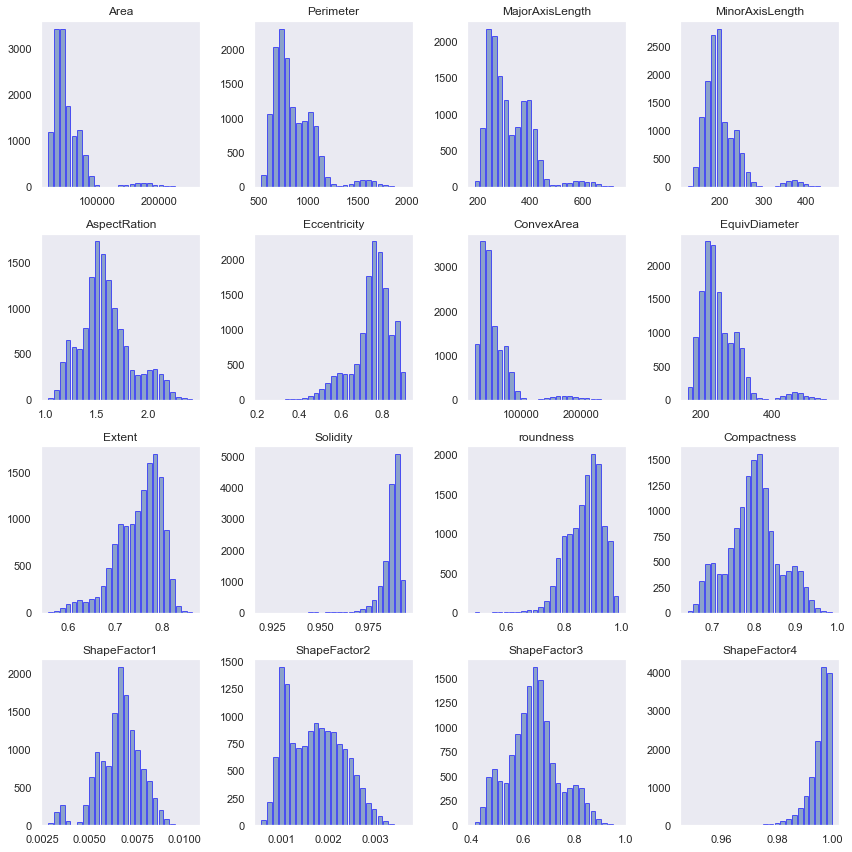

In [108]:
                            ### HISTOGRAMS FOR ALL FEATURES IN THE TABLE ###

figure(figsize=(8, 6), dpi=80)
DBD[['Area', 'Perimeter','MajorAxisLength','MinorAxisLength',
       'AspectRation', 'Eccentricity','ConvexArea','EquivDiameter', 'Extent',
       'Solidity','roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3','ShapeFactor4']].hist(bins= int(180/7),figsize=(12,12),alpha=0.6,grid=False,rwidth=0.8,ec='blue')
plt.show()

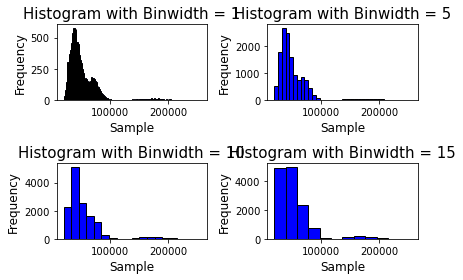

In [10]:
                            ### Histogram for feature "Area" with different Bin sizes ###

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(DBD['Area'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Sample', size = 12)
    ax.set_ylabel('Frequency', size= 12)

plt.tight_layout()
plt.show()

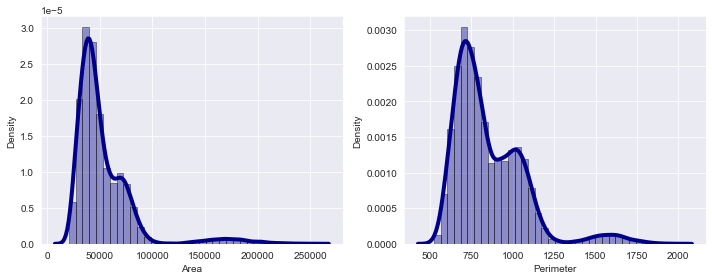

In [59]:
                                # DENSITY PLOT AND HISTOGRAM of 6 features
    
sns.set_style("darkgrid")
f, ax = plt.subplots(1,2, figsize = (10,4))

f1 = sns.distplot(DBD['Area'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax[0])

f2 = sns.distplot(DBD['Perimeter'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax[1])

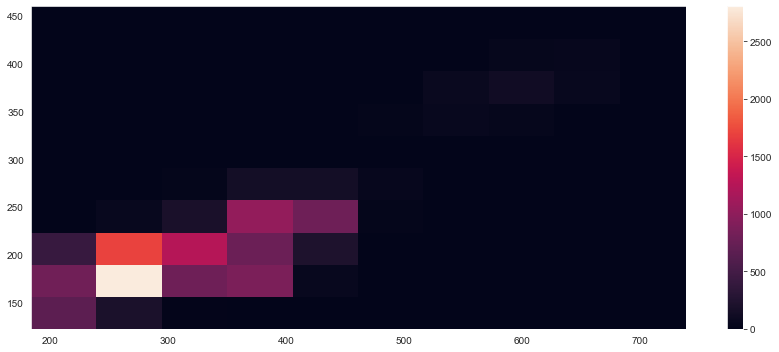

In [74]:
                                            ### 2-D HISTOGRAM ###
    
plt.hist2d(DBD['MajorAxisLength'],DBD['MinorAxisLength'])
plt.colorbar()
plt.tight_layout()
plt.show()

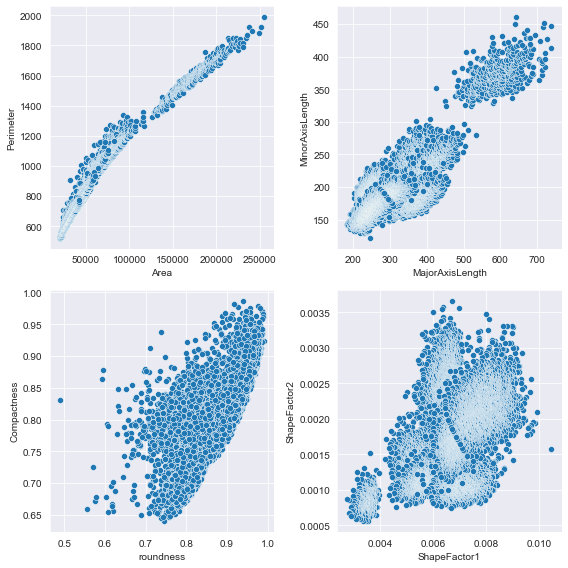

In [76]:
                                            ### SCATTERPLOTS ###
### 4 scatterplots between different freatures ###

sns.set_style("darkgrid")
f, ax = plt.subplots(2,2, figsize = (8,8))

#plot1 between Area and Perimeter
k1 = sns.scatterplot(x = DBD.Area, y = DBD.Perimeter, ax = ax[0,0],) 

#plot2 between MajorAxisLength and DBD.MinorAxisLength
k2 = sns.scatterplot(DBD.MajorAxisLength,DBD.MinorAxisLength, ax = ax[0,1])

#plot3 between roundness and Compactness
k3 = sns.scatterplot(DBD.roundness,DBD.Compactness, ax = ax[1,0])

#plot4 between ShapeFactor1 and ShapeFactor2
k4 = sns.scatterplot(DBD.ShapeFactor1,DBD.ShapeFactor2, ax = ax[1,1])

Text(0.5, 1.0, 'EquivDiameter')

<Figure size 320x320 with 0 Axes>

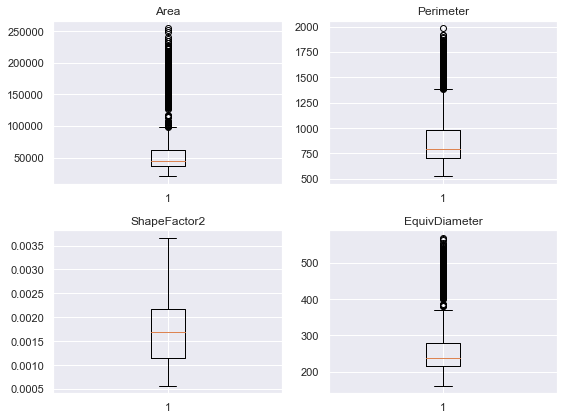

In [109]:
                                            ### BOX plots ###
figure(figsize=(4,4))
fig, axs = plt.subplots(2,2,figsize=(8,6))
axs[0, 0].boxplot(DBD['Area'])
axs[0,0].set_title('Area')

axs[0,1].boxplot(DBD['Perimeter'])
axs[0,1].set_title('Perimeter')

axs[1,0].boxplot(DBD['ShapeFactor2'])
axs[1,0].set_title('ShapeFactor2')

axs[1,1].boxplot(DBD['EquivDiameter'])
axs[1,1].set_title('EquivDiameter')


## Datset - 2 : Accelerometer Dataset
This dataset was generated for use on 'Prediction of Motor Failure Time Using An Artificial Neural Network' project (DOI: 10.3390/s19194342).A cooler fan with weights on its blades was used to generate vibrations. To this fan cooler was attached an accelerometer to collect the vibration data. With this data, motor failure time predictions were made, using an artificial neural networks. To generate three distinct vibration scenarios, the weights were distributed in three different ways: 1) 'red' - normal configuration: two weight pieces positioned on neighboring blades; 2) 'blue' - perpendicular configuration: two weight pieces positioned on blades forming a 90Â° angle; 3) 'green' - opposite configuration: two weight pieces positioned on opposite blades.

In [16]:
ACC = pd.read_csv("accelerometer.csv")

In [81]:
ACC.head(3)

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121


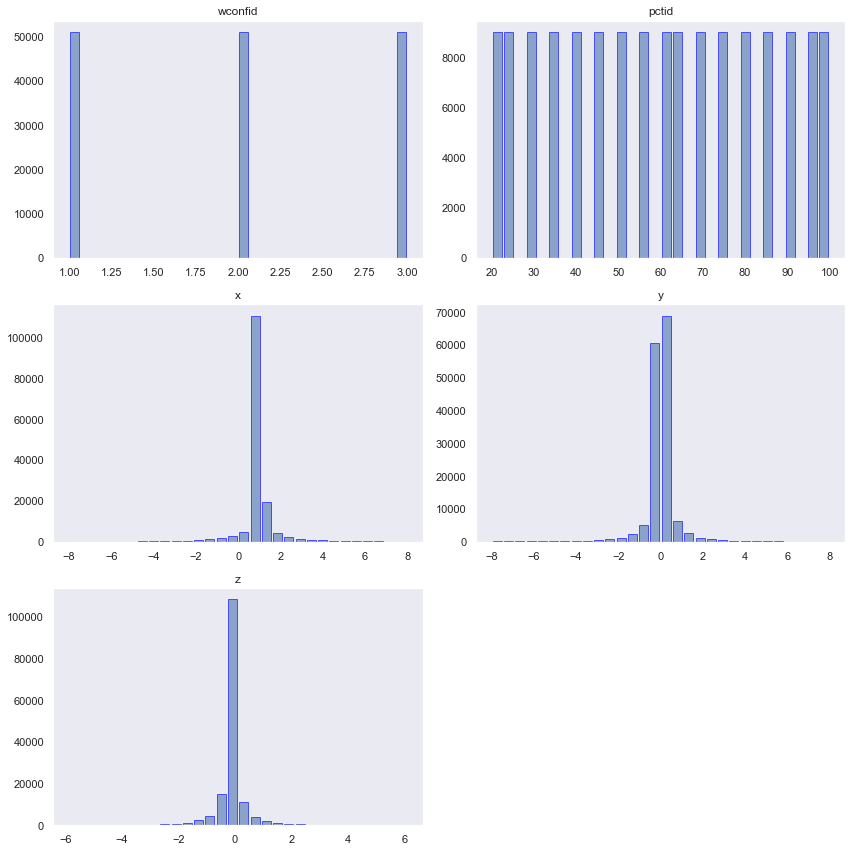

In [113]:
                            ### HISTOGRAMS FOR ALL FEATURES IN THE TABLE ###
    
ACC[['wconfid', 'pctid', 'x', 'y', 'z']].hist(bins= int(30),figsize=(12,12),alpha=0.6,grid=False,rwidth=0.8,ec='blue')
plt.show()

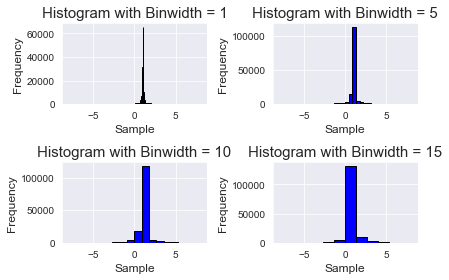

In [20]:
                    ### Histogram for feature "x" with different Bin sizes ###

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(ACC['x'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Sample', size = 12)
    ax.set_ylabel('Frequency', size= 12)

plt.tight_layout()
plt.show()

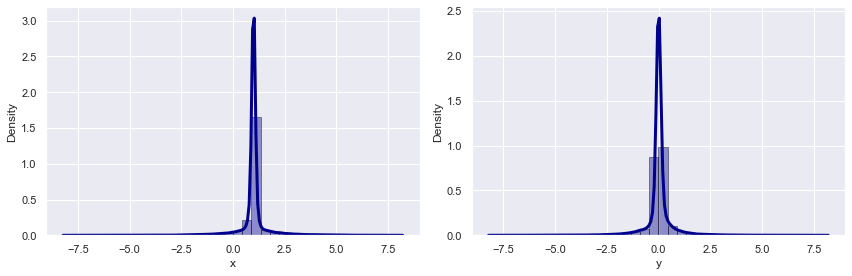

In [104]:
                                        ### DENSITY PLOT AND HISTOGRAM ###
    
sns.set_style("darkgrid")
f, ax = plt.subplots(1,2, figsize = (12,4))

f1 = sns.distplot(ACC['x'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[0])

f2 = sns.distplot(ACC['y'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[1])

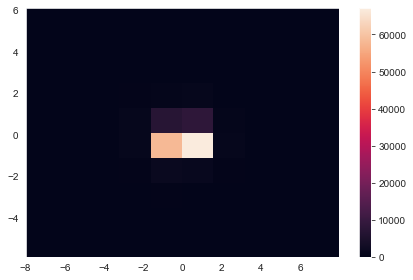

In [22]:
                                            ### 2-D HISTOGRAM ###
    
plt.hist2d(ACC['y'],ACC['z'])
plt.colorbar()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

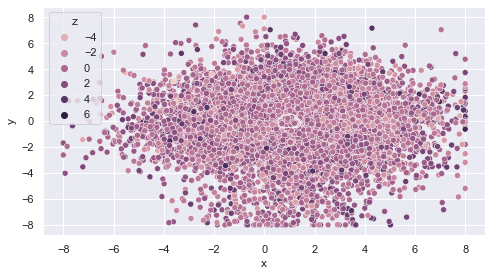

In [96]:
                                        ### SCATTERPLOT ###
sns.set(rc={'figure.figsize':(7,4)})    
sns.scatterplot(data= ACC, x="x", y="y", hue="z")

In [26]:
import seaborn as sns 

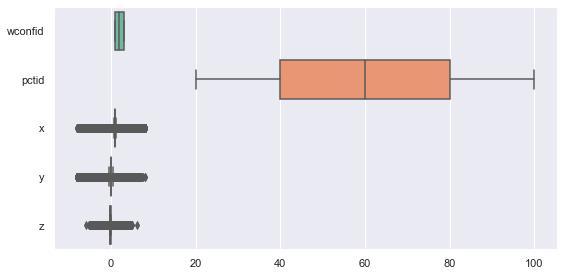

In [98]:
                                     ### BOX PLOT OF ALL NUMERIC COLUMNS ###

    
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.boxplot(data=ACC, orient="h", palette="Set2")

## Dataset - 3 : Metro Interstate Traffic Volume
Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.



In [28]:
RN= pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [29]:
RN.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


<Figure size 320x320 with 0 Axes>

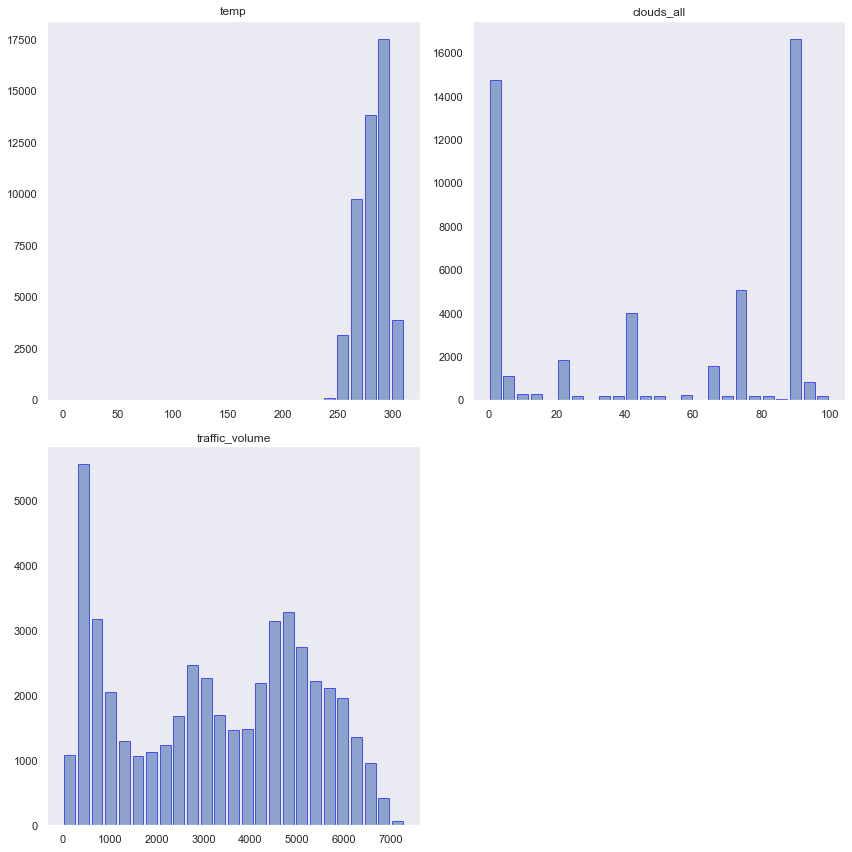

In [114]:
                           ### HISTOGRAMS FOR NUMERIC FEATURES IN THE TABLE ###
    
RN[['temp','clouds_all','traffic_volume']].hist(bins= int(180/7),figsize=(12,12),alpha=0.6,grid=False,rwidth=0.8,ec='blue')
plt.show()

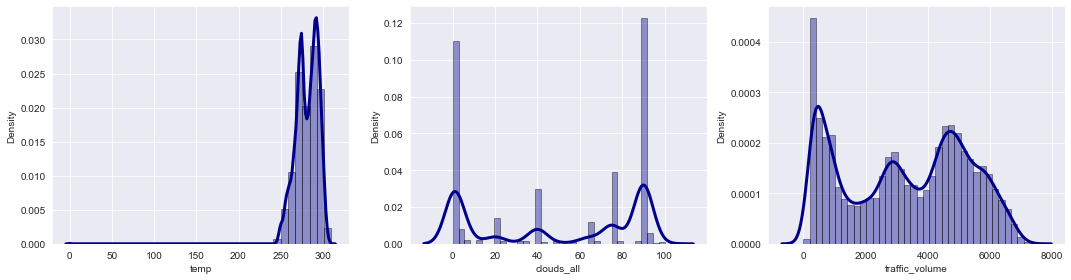

In [32]:
                                     ### DENSITY PLOT AND HISTOGRAM ###

sns.set_style("darkgrid")
f, ax = plt.subplots(1,3, figsize = (15,4))
f1 = sns.distplot(RN['temp'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[0])

f2 = sns.distplot(RN['clouds_all'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[1])

f3 = sns.distplot(RN['traffic_volume'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[2])


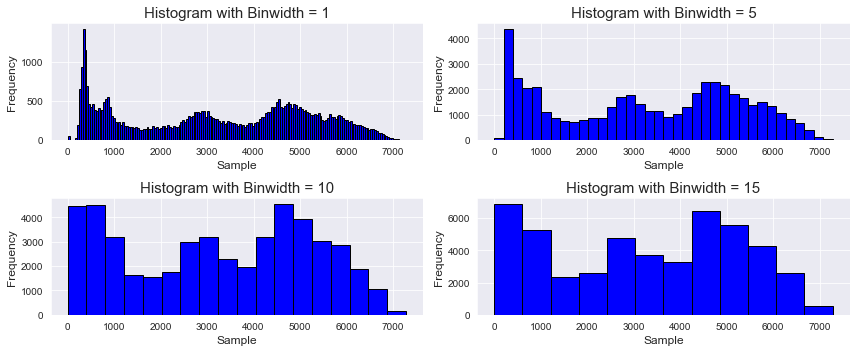

In [33]:
                    ### Histogram for feature "traffic_volume" with different Bin sizes ###

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(RN['traffic_volume'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Sample', size = 12)
    ax.set_ylabel('Frequency', size= 12)

plt.tight_layout()
plt.show()

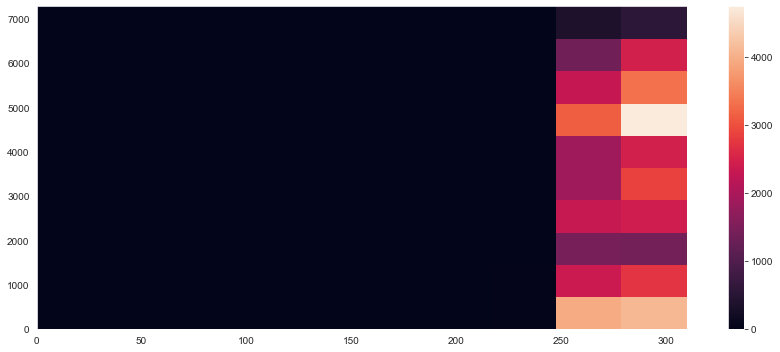

In [34]:
                                            ### 2-D HISTOGRAM ###
    
plt.hist2d(RN['temp'],RN['traffic_volume'])
plt.colorbar()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='temp', ylabel='traffic_volume'>

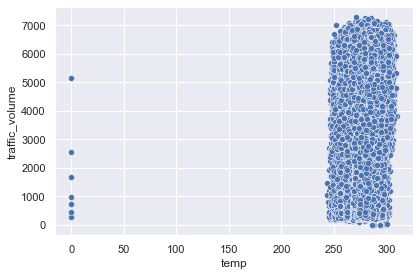

In [94]:
                                ### SCATTERPLOT ###
sns.set(rc={'figure.figsize':(6,4)})    
sns.scatterplot(data=RN, x="temp", y="traffic_volume")

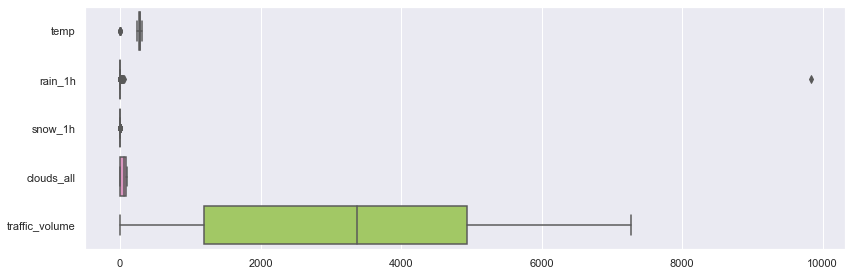

In [99]:
                                     ### BOX PLOT OF ALL NUMERIC COLUMNS ###
sns.set(rc={'figure.figsize':(12,4)})    
ax = sns.boxplot(data=RN, orient="h", palette="Set2")

## Dateset- 4 : Seoul Bike sharing demand dataset
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.



In [37]:
SB= pd.read_csv('SeoulBikeData.csv')

In [38]:
SB.head(3)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


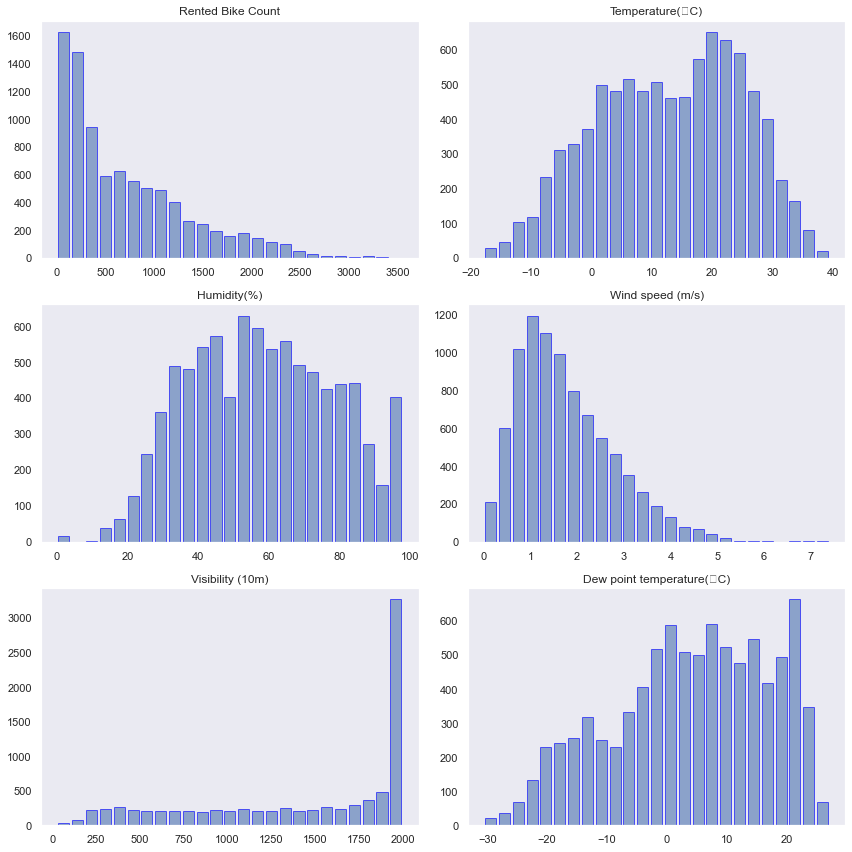

In [115]:
                           ### HISTOGRAMS FOR NUMERIC FEATURES IN THE TABLE ###

SB[['Rented Bike Count','Temperature(�C)','Humidity(%)',
   'Wind speed (m/s)','Visibility (10m)','Dew point temperature(�C)']].hist(bins= int(180/7),figsize=(12,12),alpha=0.6,grid=False,rwidth=0.8,ec='blue')
plt.show()

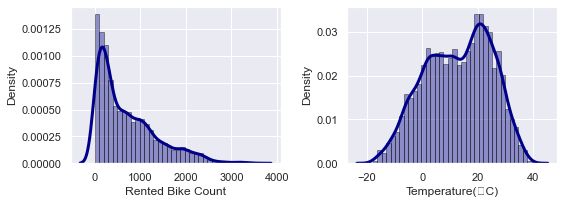

In [119]:
                                     ### DENSITY PLOT AND HISTOGRAM ###

sns.set_style("darkgrid")
f, ax = plt.subplots(1,2, figsize = (8,3))
f1 = sns.distplot(SB['Rented Bike Count'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[0])

f2 = sns.distplot(SB['Temperature(�C)'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[1])


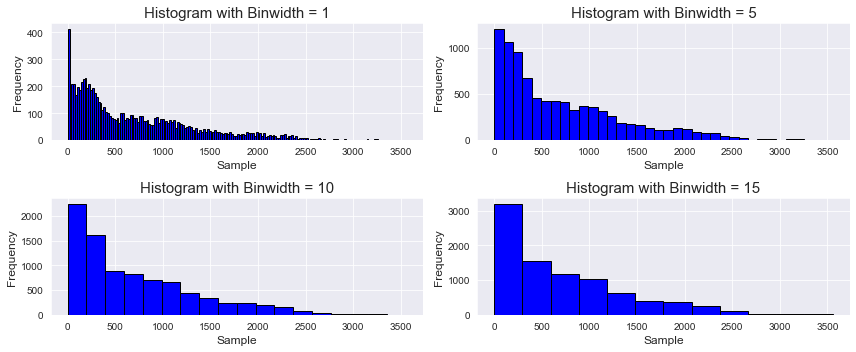

In [42]:
                    ### Histogram for feature "Rented Bike Count" with different Bin sizes ###

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(SB['Rented Bike Count'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Sample', size = 12)
    ax.set_ylabel('Frequency', size= 12)

plt.tight_layout()
plt.show()

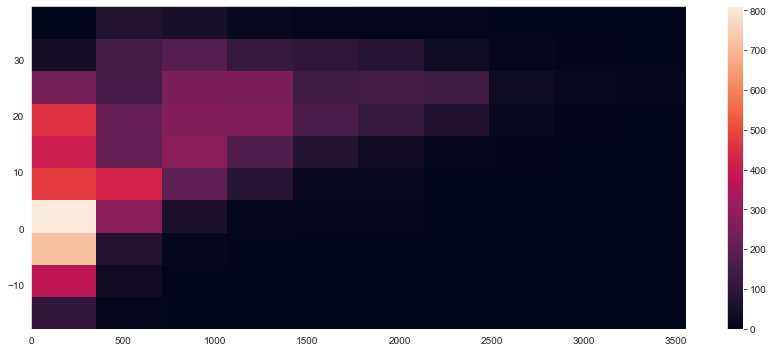

In [43]:
                                            ### 2-D HISTOGRAM ###
    
plt.hist2d(SB['Rented Bike Count'],SB['Temperature(�C)'])
plt.colorbar()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Temperature(�C)'>

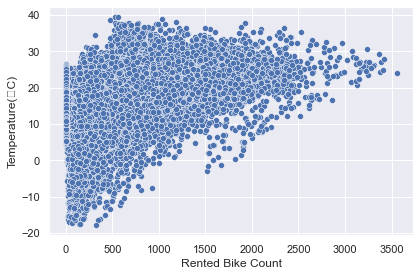

In [92]:
                                ### SCATTERPLOT ###
sns.set(rc={'figure.figsize':(6,4)})    
sns.scatterplot(data=SB, x="Rented Bike Count", y="Temperature(�C)")

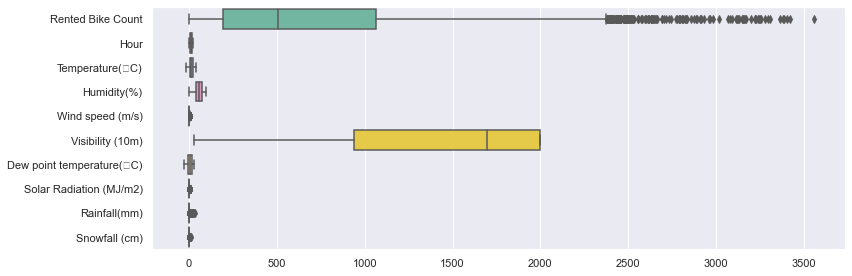

In [100]:
                                     ### BOX PLOT OF ALL NUMERIC COLUMNS ###
sns.set(rc={'figure.figsize':(12,4)})    
ax = sns.boxplot(data=SB, orient="h", palette="Set2")

## Dataset - 5 : HCV Dataset
The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).

In [46]:
HCV = pd.read_csv('hcvdat0.csv')

In [87]:
HCV.head(3)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3


In [49]:
HCV.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

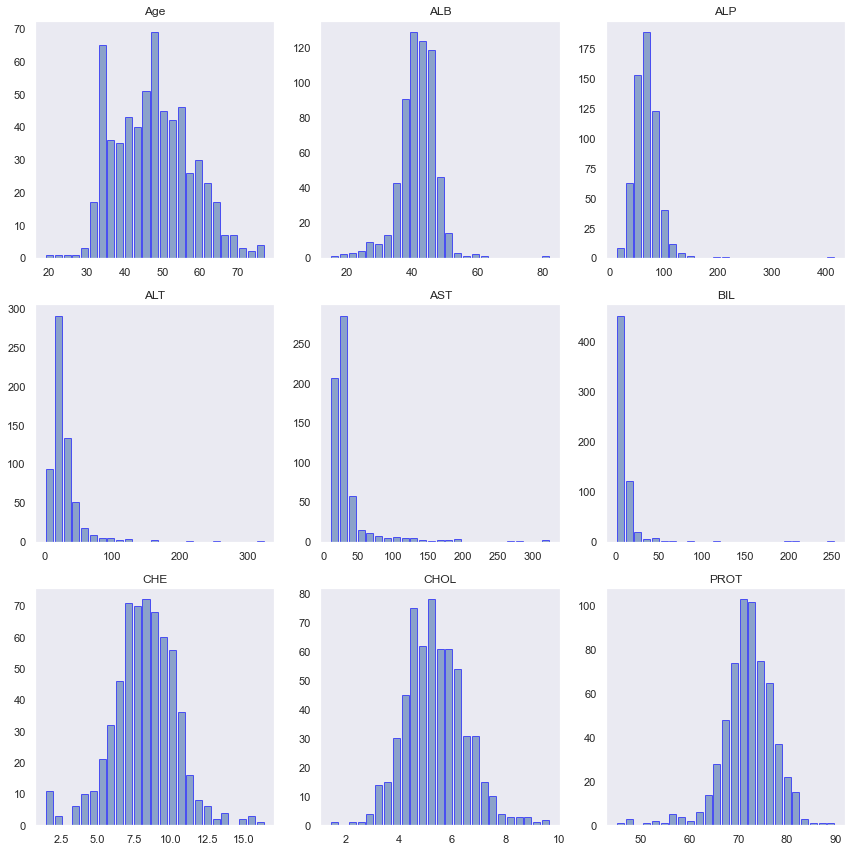

In [120]:
                           ### HISTOGRAMS FOR NUMERIC FEATURES IN THE TABLE ###

HCV[['Age', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL','PROT']].hist(bins= int(180/7),figsize=(12,12),alpha=0.6,grid=False,rwidth=0.8,ec='blue')
plt.show()

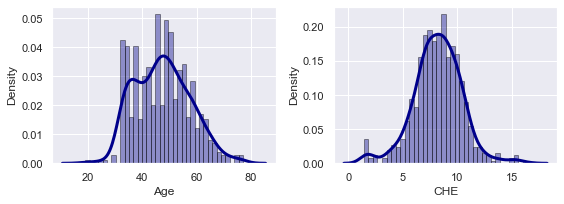

In [122]:
                                     ### DENSITY PLOT AND HISTOGRAM ###

sns.set_style("darkgrid")
f, ax = plt.subplots(1,2, figsize = (8,3))
f1 = sns.distplot(HCV['Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[0])

f2 = sns.distplot(HCV['CHE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax = ax[1])

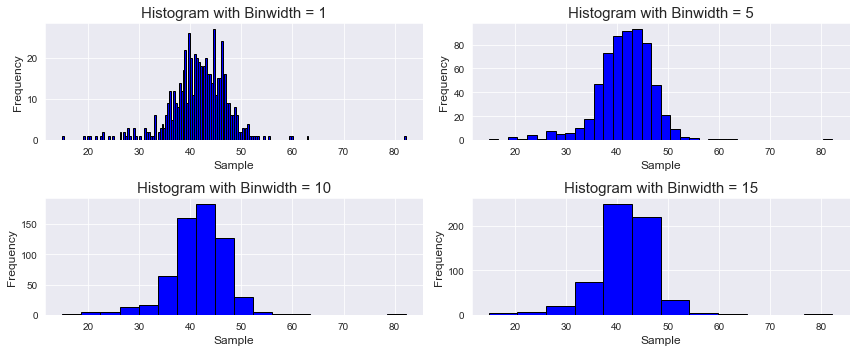

In [52]:
                    ### Histogram for feature "ALB" with different Bin sizes ###

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(HCV['ALB'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Sample', size = 12)
    ax.set_ylabel('Frequency', size= 12)

plt.tight_layout()
plt.show()

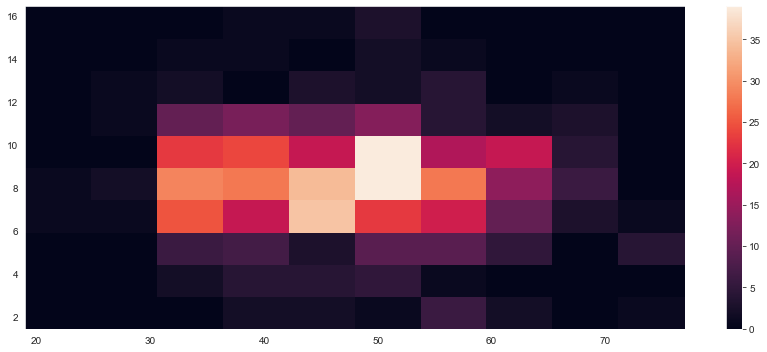

In [53]:
                                            ### 2-D HISTOGRAM ###
    
plt.hist2d(HCV['Age'],HCV['CHE'])
plt.colorbar()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='CHE'>

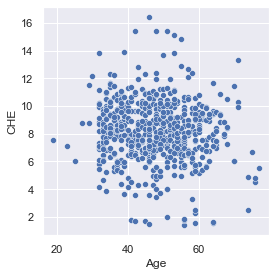

In [90]:
                                ### SCATTERPLOT ###
sns.set(rc={'figure.figsize':(4,4)})    
sns.scatterplot(data=HCV, x="Age", y="CHE")

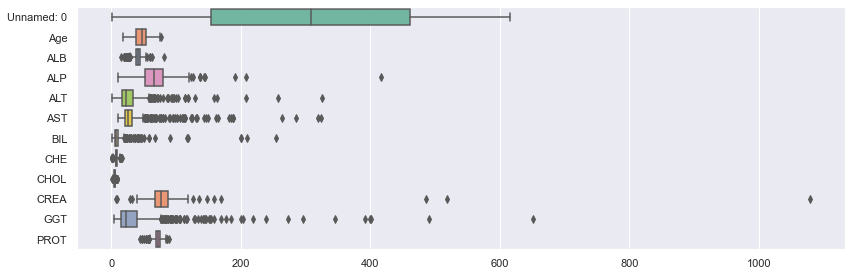

In [101]:
                                     ### BOX PLOT OF ALL NUMERIC COLUMNS ###
sns.set(rc={'figure.figsize':(12,4)})    
ax = sns.boxplot(data= HCV, orient="h", palette="Set2")